
# Árboles de decisión y bosques aleatorios (Decision Trees and Random Forests) 

Revisar el siguiente blog donde se explica la lógica general de los decision trees and random forests [blog post](https://medium.com/@josemarcialportilla/enchanted-random-forest-b08d418cb411#.hh7n1co54).

## Los datos
El conjunto de datos [kyphosis de Kaggle](https://www.kaggle.com/abbasit/kyphosis-dataset), contiene datos de niños que han tenido cirugías correctivas de espina dorsal. La cifosis (kyphosis) es una curvatura anormal de la columna vertebral.

El conjunto de datos contiene las siguientes columnas:
* Kyphosis: un factor que indica si está presente (present) o ausente (absent), después de la operación
* Age: edad en meses
* Number: número de vértebras afectadas
* Start: el número de la primera vértebra operada

Se busca predecir si se tendrá cifosis, basándose en las demás características


## Importar librerías

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.tree import export_graphviz
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from io import StringIO
# Conda install pydotplus

## Cargar los datos

In [4]:
df = pd.read_csv('kyphosis.csv')

In [5]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


## EDA


Solo revisaremos un gráfico de pairplot para este dataset.

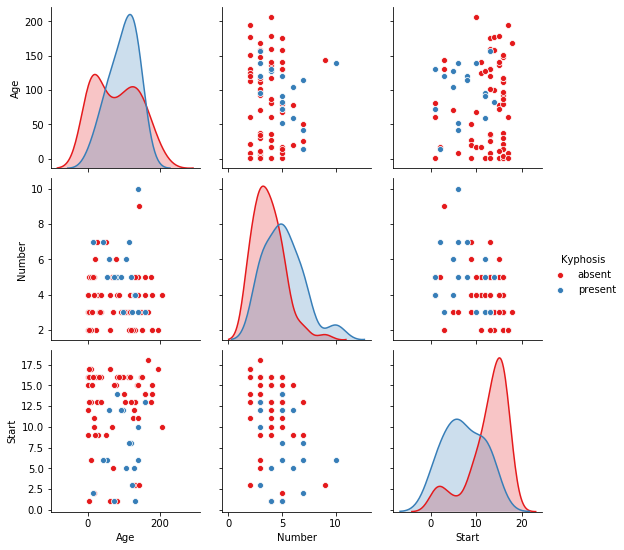

In [6]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

## Dividir los datos

¡Dividamos los datos en un conjunto de entrenamiento y un conjunto de prueba!

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42)

## Generamos el modelo de árboles de decisión

Comenzaremos entrenando un solo árbol de decisión.

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
dtree = DecisionTreeClassifier()

In [33]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Predicción y Evaluación 



In [34]:
predictions = dtree.predict(X_test)

In [35]:
from sklearn.metrics import classification_report,confusion_matrix

In [36]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.80      0.84      0.82        19
     present       0.40      0.33      0.36         6

    accuracy                           0.72        25
   macro avg       0.60      0.59      0.59        25
weighted avg       0.70      0.72      0.71        25



In [37]:
print(confusion_matrix(y_test,predictions))

[[16  3]
 [ 4  2]]


## Visualization del Árbol

Scikit learn tiene algunas capacidades de visualización incorporadas para los árboles de decisión, no se usará a menudo y requiere que se instale la biblioteca pydot, pero aquí hay un ejemplo de cómo se ve y el código para ejecutar esto:

In [17]:
from sklearn import tree
from io import StringIO
from IPython.display import Image

In [18]:
features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

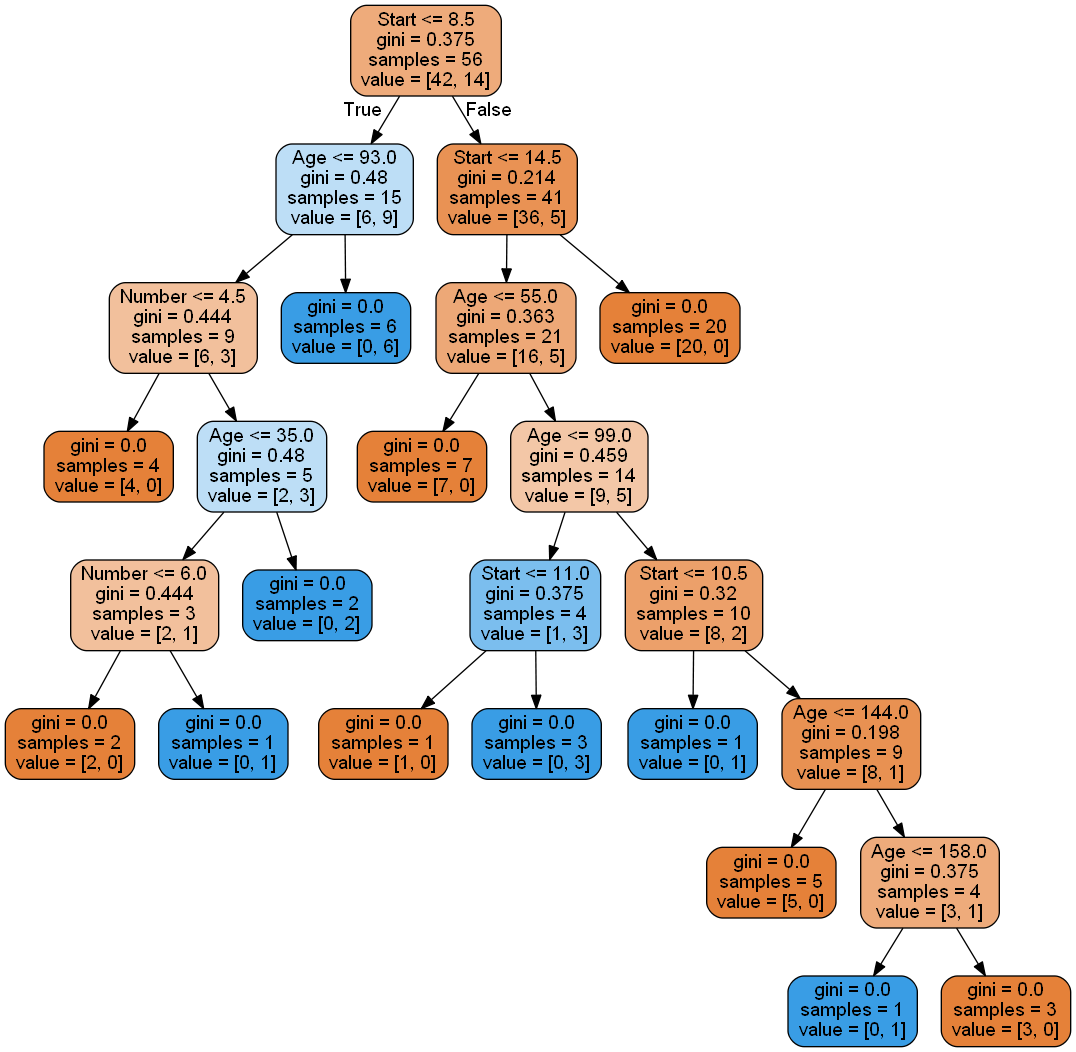

In [21]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

Image(graph.create_png())

## Bosques aleatorios

Ahora comparemos el modelo de árbol de decisión con un bosque aleatorio

In [38]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [39]:
rfc_pred = rfc.predict(X_test)

In [40]:
print(confusion_matrix(y_test,rfc_pred))

[[19  0]
 [ 5  1]]


In [41]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.79      1.00      0.88        19
     present       1.00      0.17      0.29         6

    accuracy                           0.80        25
   macro avg       0.90      0.58      0.58        25
weighted avg       0.84      0.80      0.74        25



# ¡Buen trabajo!